<a href="https://colab.research.google.com/github/oms0401/mlcoe-task/blob/main/Logistic_regression_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Raw_Data_Singapore Credit Dataset.csv')

In [ ]:
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 SGD,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 SGD,48,good,furniture/appliances,5951,< 100 SGD,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 SGD,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 SGD,42,good,furniture/appliances,7882,< 100 SGD,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 SGD,24,poor,car,4870,< 100 SGD,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

**checking for null values**

In [ ]:
df.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

In [ ]:
df.describe()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [ ]:
df.corr(numeric_only=True)

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
months_loan_duration,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834
amount,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142
percent_of_income,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207
years_at_residence,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643
age,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201
existing_loans_count,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667
dependents,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000


**checking the categorical features**

<Axes: >

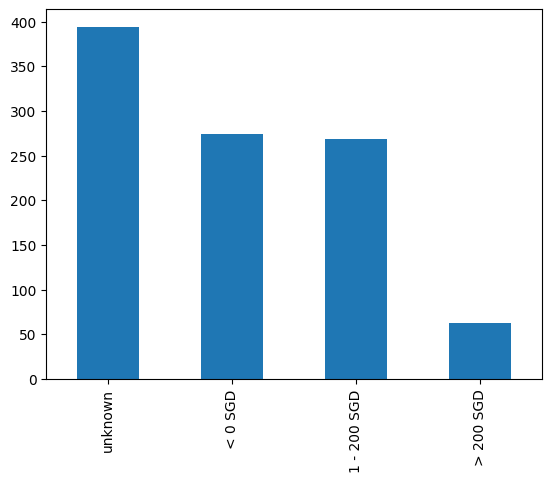

In [ ]:
df['checking_balance'].value_counts().plot(kind='bar')

<Axes: >

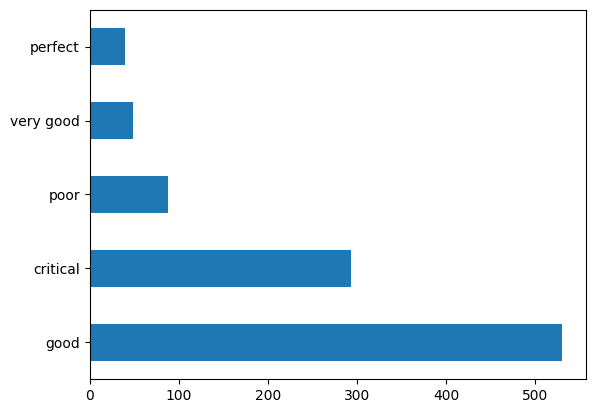

In [ ]:
df['credit_history'].value_counts().plot(kind='barh')

<Axes: ylabel='purpose'>

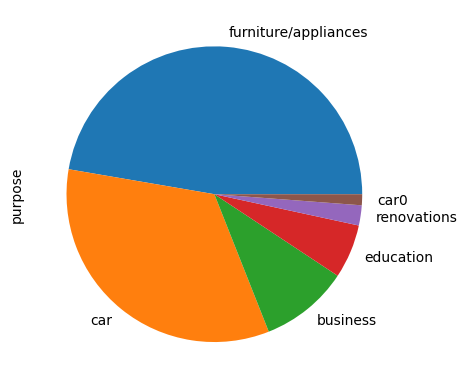

In [ ]:
df['purpose'].value_counts().plot(kind='pie')

<Axes: >

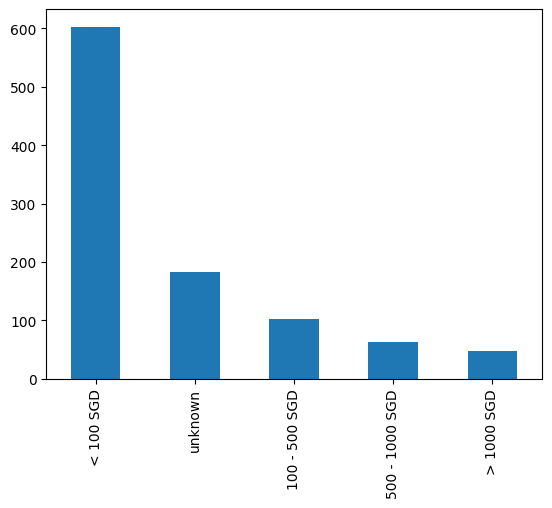

In [ ]:
df['savings_balance'].value_counts().plot(kind='bar')

<Axes: >

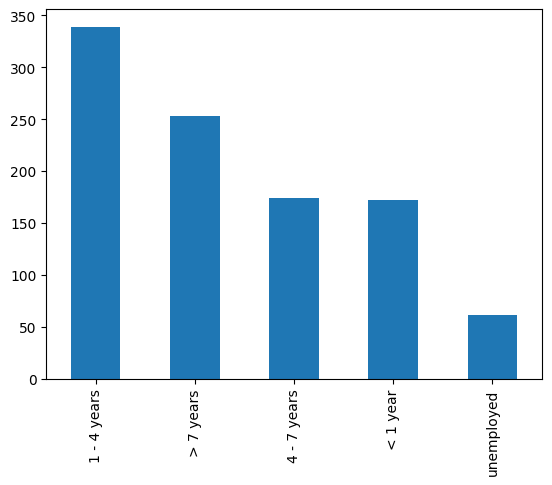

In [ ]:
df['employment_duration'].value_counts().plot(kind='bar')

<Axes: xlabel='housing', ylabel='count'>

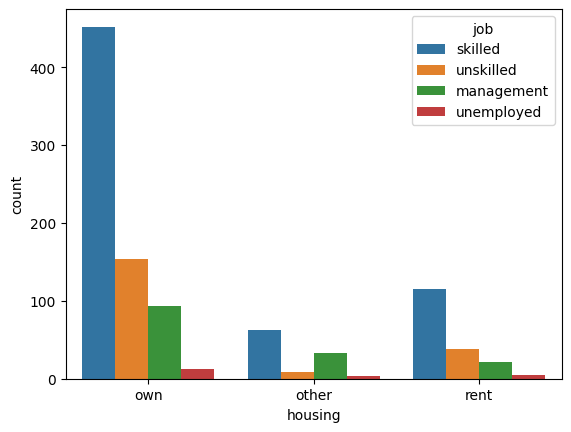

In [ ]:
sns.countplot(x=df['housing'],hue=df['job'],data=df)

**EDA MULTIVARIATE ANALYSIS**

<ipython-input-122-6813a11230be>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cbar=False)


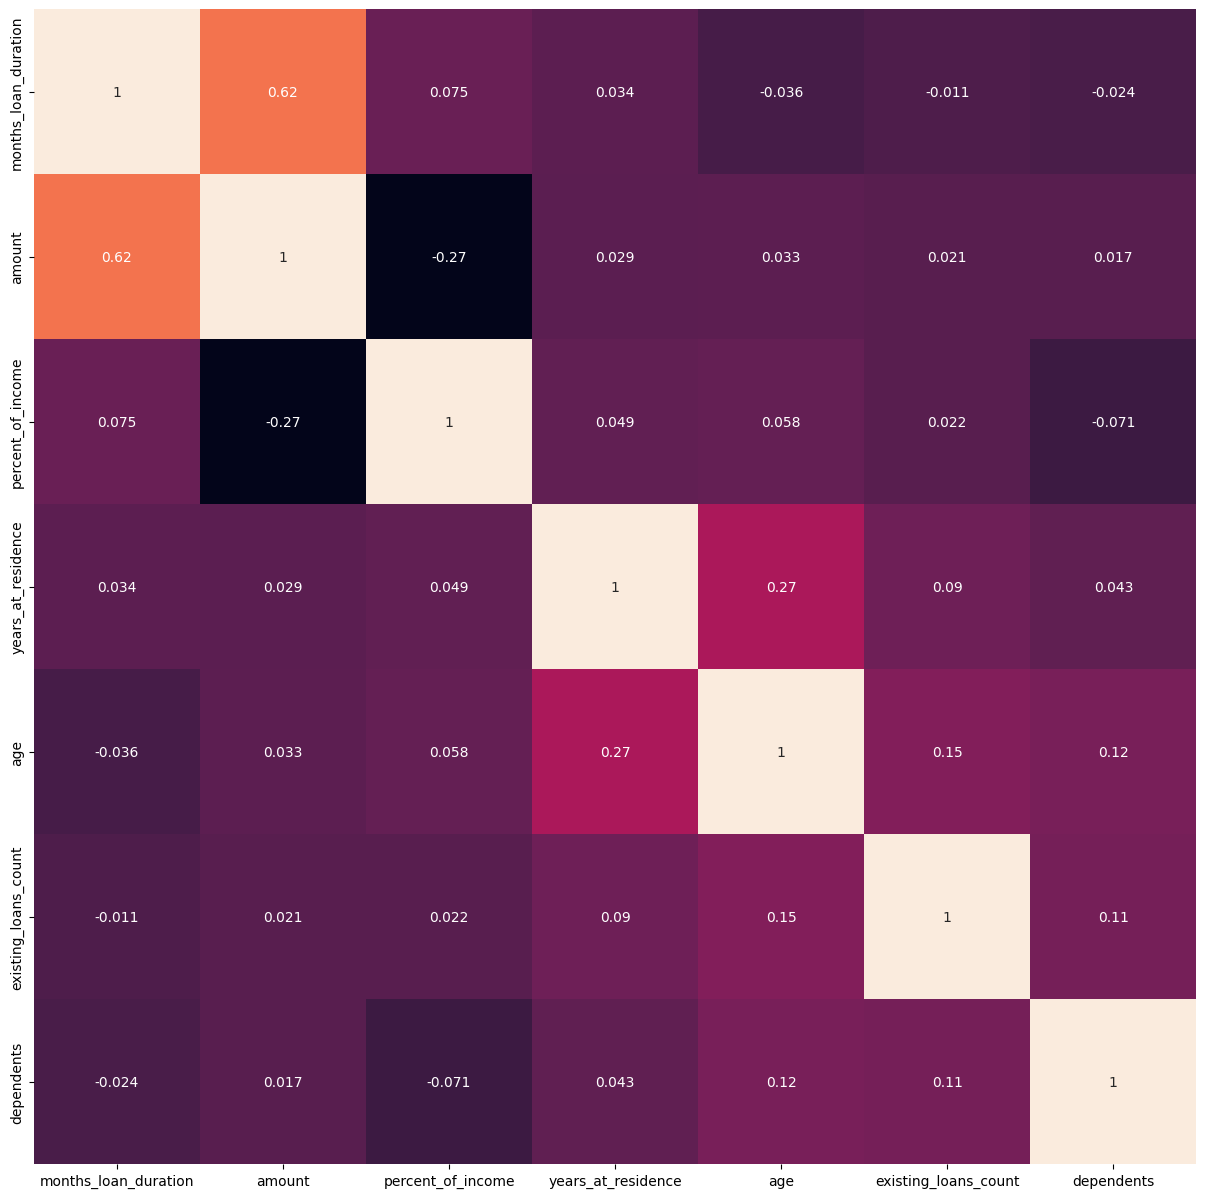

In [ ]:
#HEATMAPS
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, cbar=False)
plt.show()

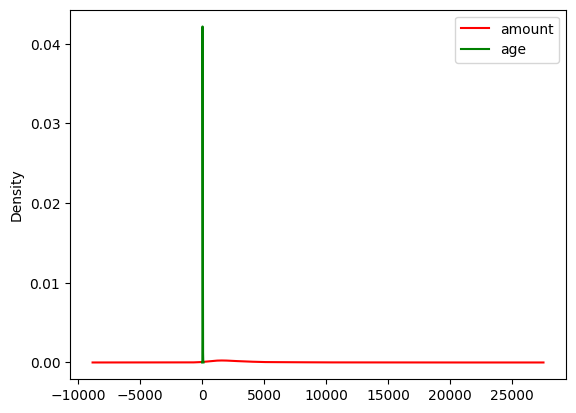

In [ ]:
#DISTRIBUTION CURVE
fig = plt.figure()
ax = fig.add_subplot(111)


df['amount'].plot(kind='kde', ax=ax, color='r')

df['age'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

<Axes: >

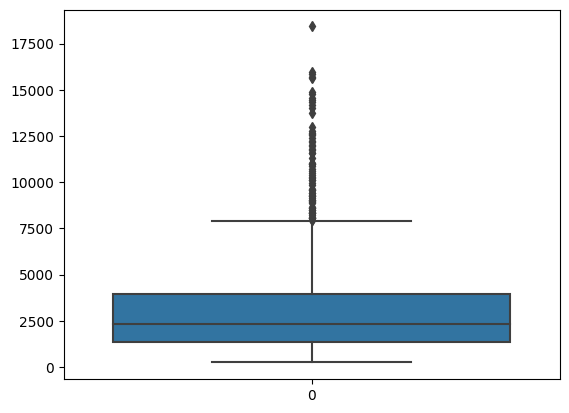

In [ ]:
#BOXPLOT FOR OUTLIERS
sns.boxplot(df['amount'])

<Axes: xlabel='amount', ylabel='Density'>

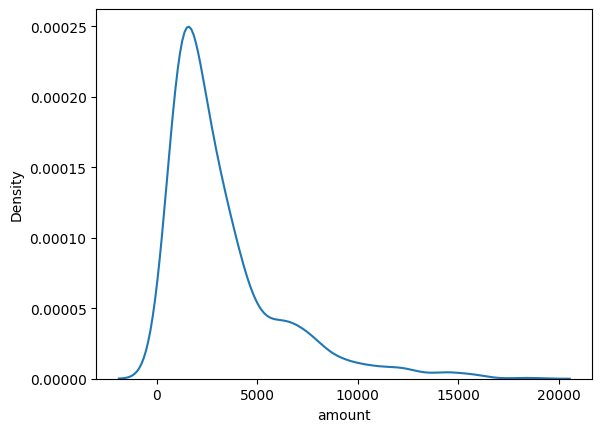

In [ ]:
sns.kdeplot(df['amount'])

numerical features -

the amount curve is skewed  due to outliers

<Axes: >

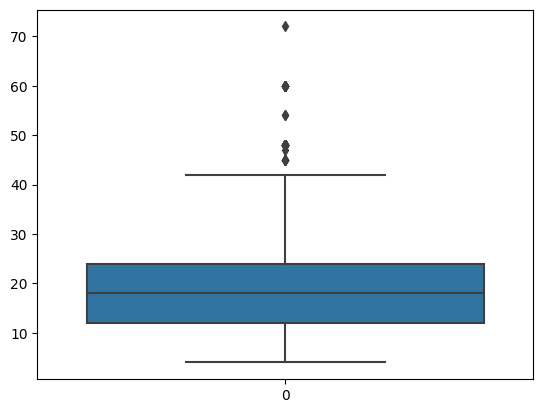

In [ ]:
sns.boxplot(df['months_loan_duration'])

<Axes: >

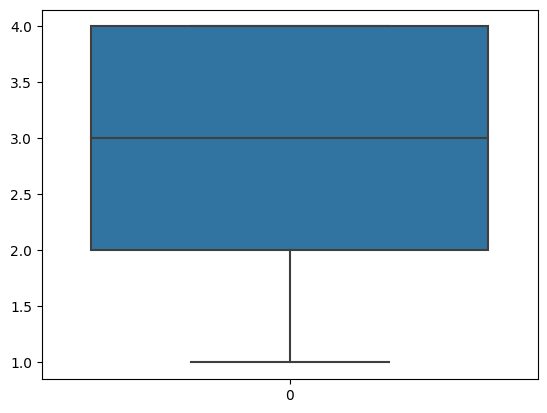

In [ ]:
sns.boxplot(df['percent_of_income'])

<Axes: >

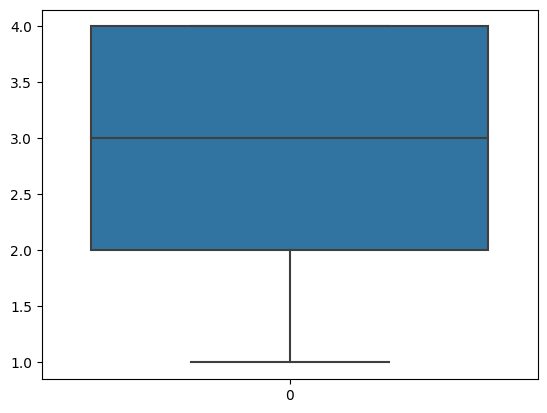

In [ ]:
sns.boxplot(df['years_at_residence'])

<Axes: >

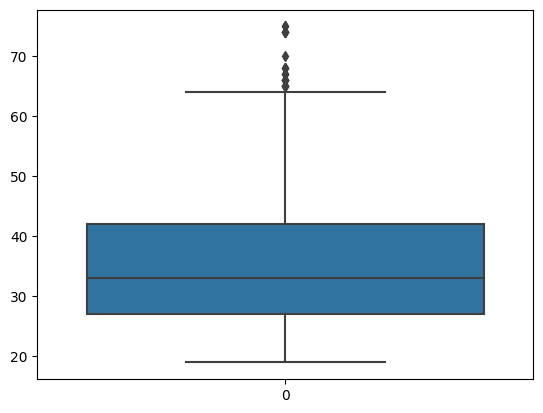

In [ ]:
sns.boxplot(df['age'])

<Axes: >

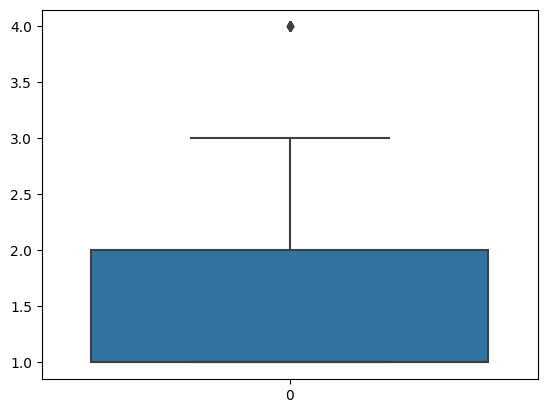

In [ ]:
sns.boxplot(df['existing_loans_count'])

<Axes: >

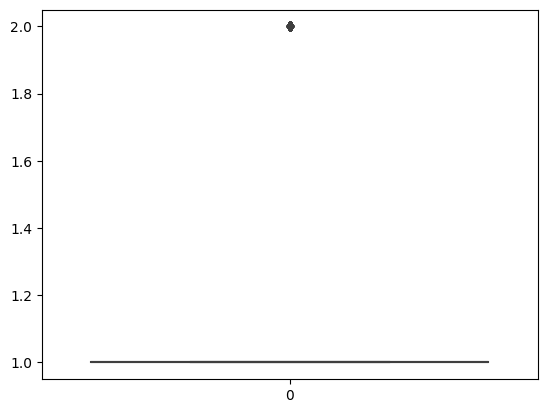

In [ ]:
sns.boxplot(df['dependents'])

**outliers**

In [ ]:
#outliers removal using iqr method
# Finding the IQR
percentile25 = df['amount'].quantile(0.25)
percentile75 = df['amount'].quantile(0.75)

In [ ]:
iqr = percentile75 - percentile25

In [ ]:
iqr

2606.75

In [ ]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [ ]:
print("amount",upper_limit)
print("amount",lower_limit)

amount 7882.375
amount -2544.625


In [ ]:
#capping the outliers
df['amount'] = np.where(
    df['amount'] > upper_limit,
    upper_limit,
    np.where(
        df['amount'] < lower_limit,
        lower_limit,
        df['amount']
    )
)

In [ ]:
print(df['amount'])

0      1169.0
1      5951.0
2      2096.0
3      7882.0
4      4870.0
        ...  
995    1736.0
996    3857.0
997     804.0
998    1845.0
999    4576.0
Name: amount, Length: 1000, dtype: float64


In [ ]:
# outlier removal in month loan duration

percentile25 = df['months_loan_duration'].quantile(0.25)
percentile75 = df['months_loan_duration'].quantile(0.75)

In [ ]:
iqr = percentile75 - percentile25

In [ ]:
iqr

12.0

In [ ]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [ ]:
print("months_loan_duration",upper_limit)
print("months_loan_duration",lower_limit)

months_loan_duration 42.0
months_loan_duration -6.0


In [ ]:
#capping the outliers
df['months_loan_duration'] = np.where(
    df['months_loan_duration'] > upper_limit,
    upper_limit,
    np.where(
        df['months_loan_duration'] < lower_limit,
        lower_limit,
        df['months_loan_duration']
    )
)

In [ ]:
#outliers removal in age

percentile25 = df['age'].quantile(0.25)
percentile75 = df['age'].quantile(0.75)

In [ ]:
iqr = percentile75 - percentile25

In [ ]:
iqr

15.0

In [ ]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [ ]:
print("age",upper_limit)
print("age",lower_limit)

age 64.5
age 4.5


In [ ]:
#capping the outliers

df['age'] = np.where(
    df['age'] > upper_limit,
    upper_limit,
    np.where(
        df['age'] < lower_limit,
        lower_limit,
        df['age']
    )
)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
df

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 SGD,6,critical,furniture/appliances,1169.0,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 SGD,48,good,furniture/appliances,5951.0,< 100 SGD,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096.0,< 100 SGD,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 SGD,42,good,furniture/appliances,7882.0,< 100 SGD,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 SGD,24,poor,car,4870.0,< 100 SGD,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,unknown,12,good,furniture/appliances,1736.0,< 100 SGD,4 - 7 years,3,4,31,none,own,1,unskilled,1,no,no
996,< 0 SGD,30,good,car,3857.0,< 100 SGD,1 - 4 years,4,4,40,none,own,1,management,1,yes,no
997,unknown,12,good,furniture/appliances,804.0,< 100 SGD,> 7 years,4,4,38,none,own,1,skilled,1,no,no
998,< 0 SGD,45,good,furniture/appliances,1845.0,< 100 SGD,1 - 4 years,4,4,23,none,other,1,skilled,1,yes,yes


In [ ]:
#ordinal encoding - balance,credit history,saving,other_credit ,	housing,job
#one hot encoding - phone,purpose
#label encoding - default

In [ ]:
#train test split
X=df.drop(['default'],axis=1)

In [ ]:
y=df['default']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2)
X_train

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone
85,unknown,12,critical,business,1412.000,< 100 SGD,1 - 4 years,4,2,29,none,own,2,management,1,yes
401,1 - 200 SGD,18,critical,business,1887.000,unknown,1 - 4 years,4,4,28,bank,own,2,skilled,1,no
988,< 0 SGD,24,good,car,6579.000,< 100 SGD,unemployed,4,2,29,none,other,1,management,1,yes
877,unknown,36,good,furniture/appliances,3595.000,< 100 SGD,> 7 years,4,2,28,none,own,1,skilled,1,no
921,unknown,48,poor,furniture/appliances,7882.375,500 - 1000 SGD,4 - 7 years,4,1,37,none,own,1,management,1,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,unknown,36,perfect,renovations,2613.000,< 100 SGD,1 - 4 years,4,2,27,none,own,2,skilled,1,no
278,unknown,6,good,furniture/appliances,4611.000,< 100 SGD,< 1 year,1,4,32,none,own,1,skilled,1,no
569,< 0 SGD,48,good,furniture/appliances,6758.000,< 100 SGD,1 - 4 years,3,2,31,none,own,1,skilled,1,yes
46,unknown,36,good,furniture/appliances,2299.000,500 - 1000 SGD,> 7 years,4,4,39,none,own,1,skilled,1,no


In [ ]:
transformer = ColumnTransformer(transformers=[
    ('tnf1',OrdinalEncoder(categories=[['unknown','< 0 SGD','1 - 200 SGD','> 200 SGD']]),['checking_balance']),
    ('tnf2',OrdinalEncoder(categories=[['good','critical','poor','very good','perfect']]),['credit_history']),
    ('tnf3',OrdinalEncoder(categories=[['unknown','< 100 SGD','100 - 500 SGD','500 - 1000 SGD','> 1000 SGD']]),['savings_balance']),
    ('tnf4',OrdinalEncoder(categories=[['unemployed','< 1 year','1 - 4 years','4 - 7 years','> 7 years']]),['employment_duration']),
    ('tnf5',OrdinalEncoder(categories=[['none','store','bank']]),['other_credit']),
    ('tnf6',OrdinalEncoder(categories=[['rent','other','own']]),['housing']),
    ('tnf7',OrdinalEncoder(categories=[['unemployed','unskilled','skilled','management']]),['job']),
    ('tnf8',OneHotEncoder(sparse=False,drop='first'),['phone','purpose'])
],remainder='passthrough')

In [ ]:
X_train

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone
85,unknown,12,critical,business,1412.000,< 100 SGD,1 - 4 years,4,2,29,none,own,2,management,1,yes
401,1 - 200 SGD,18,critical,business,1887.000,unknown,1 - 4 years,4,4,28,bank,own,2,skilled,1,no
988,< 0 SGD,24,good,car,6579.000,< 100 SGD,unemployed,4,2,29,none,other,1,management,1,yes
877,unknown,36,good,furniture/appliances,3595.000,< 100 SGD,> 7 years,4,2,28,none,own,1,skilled,1,no
921,unknown,48,poor,furniture/appliances,7882.375,500 - 1000 SGD,4 - 7 years,4,1,37,none,own,1,management,1,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,unknown,36,perfect,renovations,2613.000,< 100 SGD,1 - 4 years,4,2,27,none,own,2,skilled,1,no
278,unknown,6,good,furniture/appliances,4611.000,< 100 SGD,< 1 year,1,4,32,none,own,1,skilled,1,no
569,< 0 SGD,48,good,furniture/appliances,6758.000,< 100 SGD,1 - 4 years,3,2,31,none,own,1,skilled,1,yes
46,unknown,36,good,furniture/appliances,2299.000,500 - 1000 SGD,> 7 years,4,4,39,none,own,1,skilled,1,no


In [ ]:
X_transformed=transformer.fit_transform(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_transformed

array([[ 0.,  1.,  1., ..., 29.,  2.,  1.],
       [ 2.,  1.,  0., ..., 28.,  2.,  1.],
       [ 1.,  0.,  1., ..., 29.,  1.,  1.],
       ...,
       [ 1.,  0.,  1., ..., 31.,  1.,  1.],
       [ 0.,  0.,  3., ..., 39.,  1.,  1.],
       [ 2.,  0.,  3., ..., 66.,  1.,  1.]])

encoded dataset should be there

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
X_scr=scaler.fit_transform(X_transformed)

In [ ]:
X_test_transformed=transformer.transform(X_test)

In [ ]:
X_scr_test=scaler.transform(X_test_transformed)

In [ ]:
#label encoding
le = LabelEncoder()

In [ ]:
le.fit(y_train)

LabelEncoder()

In [ ]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [ ]:
logReg = LogisticRegression(solver='lbfgs', max_iter=1000)

In [ ]:
logReg.fit(X_transformed, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
logReg.score(X_test_transformed, y_test)

0.77

In [ ]:
y_hat = logReg.predict(X_test_transformed)

In [ ]:
accuracy_score(y_test, y_hat)

0.77

In [ ]:
X_test_transformed

array([[ 0.,  1.,  0., ..., 33.,  2.,  2.],
       [ 2.,  0.,  2., ..., 29.,  1.,  1.],
       [ 2.,  0.,  1., ..., 33.,  1.,  1.],
       ...,
       [ 0.,  0.,  0., ..., 37.,  1.,  1.],
       [ 1.,  1.,  1., ..., 25.,  2.,  1.],
       [ 0.,  0.,  1., ..., 54.,  1.,  1.]])